In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pickle as pkl
from keras.callbacks import Callback, ModelCheckpoint
import pandas as pd

In [15]:
root_folder_samples = '/content/drive/MyDrive/магистратура/Обработка и анализ изображений/data/'
root_folder_models = '/content/drive/MyDrive/магистратура/Обработка и анализ изображений/data/models/'

In [16]:
with open(root_folder_samples+"test_20.pkl",'rb') as noize_20, open(root_folder_samples+"test_50.pkl",'rb') as noize_50, open(root_folder_samples+"test_100.pkl",'rb') as noize_100, open(root_folder_samples+"test_200.pkl",'rb') as noize_200, open(root_folder_samples+'test_orig.pkl','rb') as test_sample, open(root_folder_samples+'train_label.pkl','rb') as train_label, open(root_folder_samples+'test_label.pkl','rb') as test_label:
  sample_1 = pkl.load(test_sample)/255
  sample_2 = pkl.load(noize_20)/255
  sample_3 = pkl.load(noize_50)/255
  sample_4 = pkl.load(noize_100)/255
  sample_5 = pkl.load(noize_200)/255
  labels = pkl.load(test_label)-1

In [17]:
samples = [{'sample':sample_1, 'noizes':0},
           {'sample':sample_2, 'noizes':20},
           {'sample':sample_3, 'noizes':50},
           {'sample':sample_4, 'noizes':100},
           {'sample':sample_5, 'noizes':200}
           ]

In [18]:
with open(root_folder_samples+'test_triplex_font.pkl','rb') as triplex_test,open(root_folder_samples+'test_triplex_font_label.pkl','rb') as triplex_test_label:
  triplex_sample = pkl.load(triplex_test)/255
  triplex_label = pkl.load(triplex_test_label)-1 

with open(root_folder_samples+'test_width_font.pkl','rb') as width_test,open(root_folder_samples+'test_width_font_label.pkl','rb') as width_test_label:
  width_sample = pkl.load(width_test)/255
  width_label = pkl.load(width_test_label)-1 

In [19]:
model_rmsprop = keras.models.load_model(root_folder_models+"RMSPROP_MODEL_4k.h5")
with open(root_folder_models+"RMSPROP_HIST_4k.pkl",'rb') as history:
  hist_rmsprop = pkl.load(history)

model_adam = keras.models.load_model(root_folder_models+"ADAM_MODEL_4k.h5")
with open(root_folder_models+"ADAM_HIST_4k.pkl",'rb') as history:
  hist_adam = pkl.load(history)

adam600 = keras.models.load_model(root_folder_models+"model_train_600.h5")
adam400 = keras.models.load_model(root_folder_models+"model_train_400.h5")
adam200 = keras.models.load_model(root_folder_models+"model_train_200.h5")
adam100 = keras.models.load_model(root_folder_models+"model_train_100.h5")

In [20]:
adam_models = {'800':model_adam, '600':adam600, '400':adam400, '200':adam200, '100':adam100}

## RMSProp-based

### Характеристики

In [21]:
model_rmsprop.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 96, 96, 16)        416       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 24, 24, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 21, 21, 12)        3084      
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 5, 5, 12)         0         
 g2D)                                                            
                                                                 
 flatten_19 (Flatten)        (None, 300)               0         
                                                                 
 dense_21 (Dense)            (None, 4)               

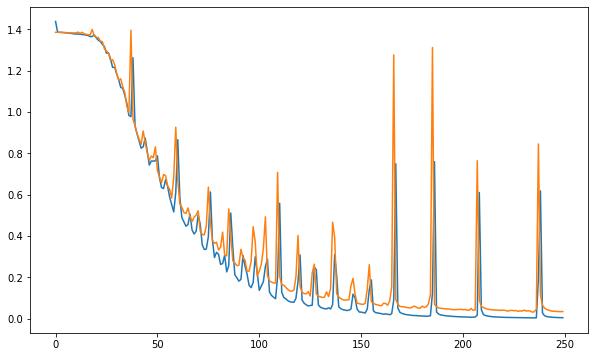

In [22]:
plt.figure(figsize=(10,6))
plt.plot(hist_rmsprop['loss'], label='loss')
plt.plot(hist_rmsprop['val_loss'], label = 'val_loss')

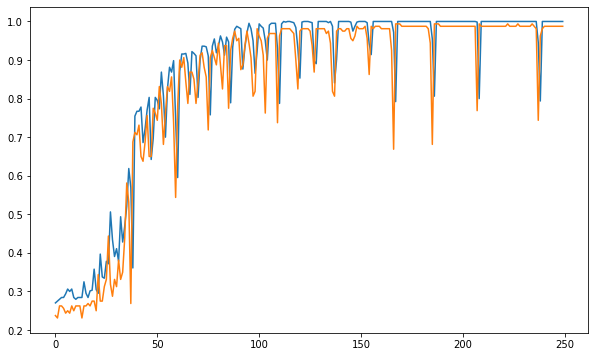

In [23]:
plt.figure(figsize=(10,6))
plt.plot(hist_rmsprop['acc'], label='acc')
plt.plot(hist_rmsprop['val_acc'], label = 'val_acc')

### Тесты

In [24]:
output = []
for sample in samples:
  x = model_rmsprop.evaluate(sample['sample'], labels, verbose = 0)
  output.append([800, 20, sample['noizes'], x[1], x[0]])

In [25]:
results_rmsprop = pd.DataFrame(data = output, columns = ['Размер тренировочной выборки', 'Размер тестовой выборки', 'Количество шумов', 'Точность','Ф-я потерь'])

#### Общий

In [26]:
results_rmsprop

,Размер тренировочной выборки,Размер тестовой выборки,Количество шумов,Точность,Ф-я потерь
0,800,20,0,1.0,0.011275
1,800,20,20,1.0,0.011312
2,800,20,50,1.0,0.011563
3,800,20,100,1.0,0.028888
4,800,20,200,0.9,0.230250


#### Triplex Font Test

In [27]:
model_rmsprop.evaluate(triplex_sample, triplex_label)

25/25 [==============================] - 1s 47ms/step - loss: 10.5952 - acc: 0.2825


[10.595184326171875, 0.2824999988079071]

#### Width Font Test

In [28]:
model_rmsprop.evaluate(width_sample, width_label)

25/25 [==============================] - 1s 46ms/step - loss: 12.9925 - acc: 0.2362


[12.992535591125488, 0.23624999821186066]

## ADAM-based

### Характеристики

In [29]:
model_adam.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 96, 96, 16)        416       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 24, 24, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 21, 21, 12)        3084      
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 5, 5, 12)         0         
 g2D)                                                            
                                                                 
 flatten_20 (Flatten)        (None, 300)               0         
                                                                 
 dense_22 (Dense)            (None, 4)               

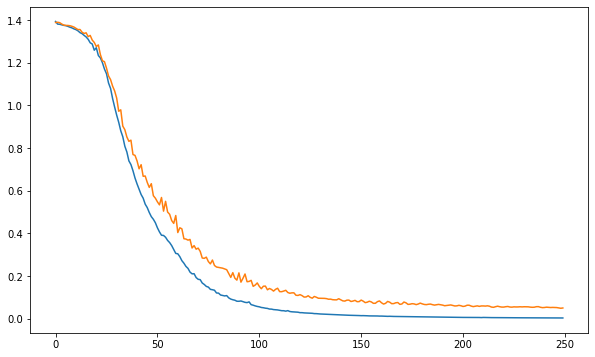

In [30]:
plt.figure(figsize=(10,6))
plt.plot(hist_adam['loss'], label='loss')
plt.plot(hist_adam['val_loss'], label = 'val_loss')

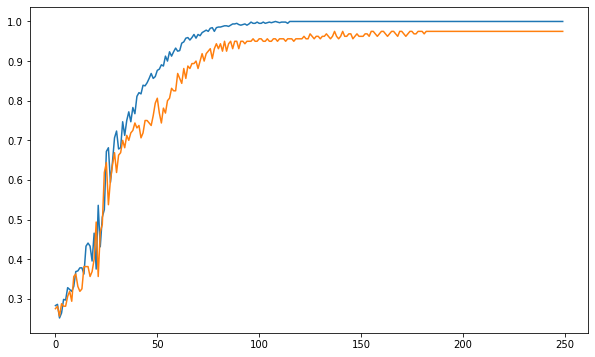

In [31]:
plt.figure(figsize=(10,6))
plt.plot(hist_adam['acc'], label='acc')
plt.plot(hist_adam['val_acc'], label = 'val_acc')

### Тесты

In [32]:
output = []
for key in adam_models.keys():
  for sample in samples:
    x = adam_models[key].evaluate(sample['sample'], labels, verbose = 0)
    output.append([key, 20, sample['noizes'], x[1], x[0]])

In [33]:
results_adam = pd.DataFrame(data = output, columns = ['Размер тренировочной выборки', 'Размер тестовой выборки', 'Количество шумов', 'Точность','Ф-я потерь'])

#### Общий

In [34]:
results_adam

,Размер тренировочной выборки,Размер тестовой выборки,Количество шумов,Точность,Ф-я потерь
0,800,20,0,1.00,0.022642
1,800,20,20,1.00,0.047060
2,800,20,50,1.00,0.087192
3,800,20,100,0.75,0.721217
4,800,20,200,0.60,3.388574
5,600,20,0,0.55,9.436274
6,600,20,20,0.50,12.649080
7,600,20,50,0.40,14.980696
8,600,20,100,0.45,16.439709
9,600,20,200,0.45,19.082609


#### Triplex Font Test

In [35]:
model_adam.evaluate(triplex_sample, triplex_label)

25/25 [==============================] - 1s 45ms/step - loss: 13.7870 - acc: 0.3175


[13.78695297241211, 0.3174999952316284]

#### Width Font Test

In [36]:
model_adam.evaluate(width_sample, width_label)

25/25 [==============================] - 1s 46ms/step - loss: 19.4014 - acc: 0.3200


[19.401365280151367, 0.3199999928474426]